In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [65]:
data=pd.read_csv('income.csv')

In [66]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [67]:
data.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [68]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


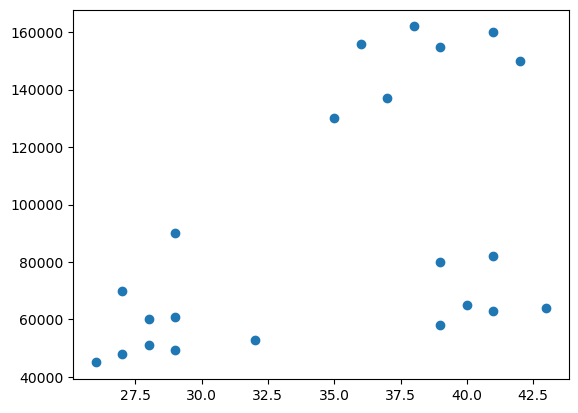

In [69]:
plt.scatter(x=data['Age'],y=data['Income($)'])
plt.show()

In [70]:
k_range=range(1,len(data))
k_range

range(1, 22)

In [71]:
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(data[['Age','Income($)']])

    sse.append(km.inertia_)

c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

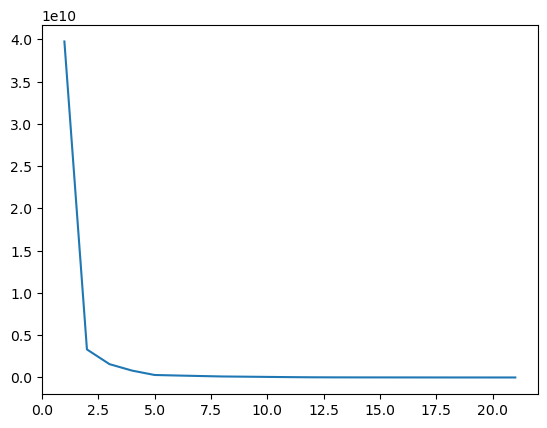

In [72]:
plt.plot(k_range,sse)
plt.show()

In [73]:
km=KMeans(n_clusters=3)
km
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted
data['cluster']=y_predicted
data

c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [74]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [75]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

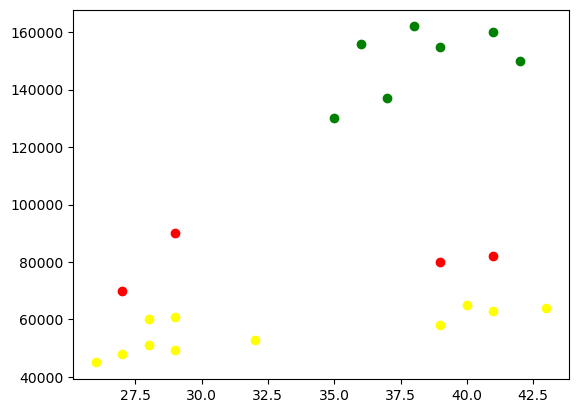

In [76]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
data3=data[data['cluster']==2]
plt.scatter(data1['Age'],data1['Income($)'],color='Red')
plt.scatter(data2['Age'],data2['Income($)'],color='Green')
plt.scatter(data3['Age'],data3['Income($)'],color='Yellow')

In [77]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca.fit(data[['Income($)','Age']])
data[['Income($)','Age']]=sca.transform(data[['Income($)','Age']])
data


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [81]:
centroids=km.cluster_centers_

In [78]:
km=KMeans(n_clusters=3)
km
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted
data['cluster']=y_predicted
data

c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


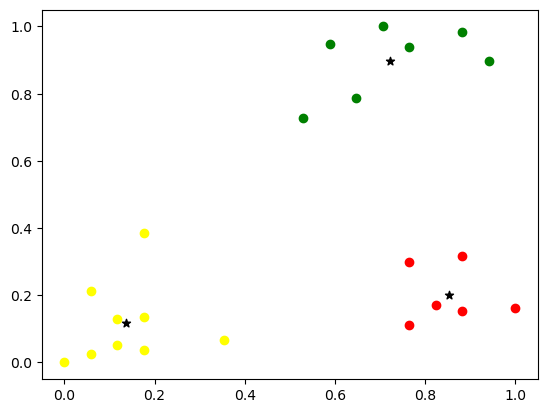

In [85]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
data3=data[data['cluster']==2]
plt.scatter(data1['Age'],data1['Income($)'],color='Red')
plt.scatter(data2['Age'],data2['Income($)'],color='Green')
plt.scatter(data3['Age'],data3['Income($)'],color='Yellow')
plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='*')
plt.show()